## LIBRERIAS

In [1]:
import pandas as pd

In [2]:
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore")


from plotly.offline import plot,iplot
#pd.options.plotting.backend = "plotly"
import plotly.graph_objects as go
import plotly.express as px#graficos express
from palettable.scientific.diverging import Berlin_20
#https://jiffyclub.github.io/palettable/
Berlin_20.hex_colors
cf.go_offline()
pd.set_option("display.max_columns",200)

In [3]:
import sys
sys.path.append("../libreria/")
from libreria import *


## DATOS

In [4]:
df=pd.read_csv("../data/outliers_missings/dataset_house_prices.csv")

In [5]:
v_feats=["MSSubClass","MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Condition1","Condition2","BldgType","HouseStyle","OverallQual","OverallCond",
        "YearBuilt","YearRemodAdd","RoofStyle","RoofMatl","MasVnrType","ExterQual",
        "ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
        "Heating","HeatingQC","CentralAir","Electrical","LowQualFinSF","BsmtHalfBath","FullBath","KitchenAbvGr","KitchenQual","Functional","Fireplaces","FireplaceQu",
        "GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence",
        "MiscFeature","MoSold","YrSold","SaleType","SaleCondition"]
c_feats=["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
        "2ndFlrSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch",
        "PoolArea","MiscVal","BedroomAbvGr","HalfBath","GarageCars","BsmtFullBath","TotRmsAbvGrd"]
tgt=["SalePrice"]

df=rename_cols(df,v_feats,"v_")
df=rename_cols(df,c_feats,"c_")
df=rename_cols(df,tgt,"tgt_")

In [6]:
df.head()

,Id,v_MSSubClass,v_MSZoning,c_LotFrontage,c_LotArea,v_Street,v_Alley,v_LotShape,v_LandContour,v_Utilities,v_LotConfig,v_LandSlope,Neighborhood,v_Condition1,v_Condition2,v_BldgType,v_HouseStyle,v_OverallQual,v_OverallCond,v_YearBuilt,v_YearRemodAdd,v_RoofStyle,v_RoofMatl,Exterior1st,Exterior2nd,v_MasVnrType,c_MasVnrArea,v_ExterQual,v_ExterCond,v_Foundation,v_BsmtQual,v_BsmtCond,v_BsmtExposure,v_BsmtFinType1,c_BsmtFinSF1,v_BsmtFinType2,c_BsmtFinSF2,c_BsmtUnfSF,c_TotalBsmtSF,v_Heating,v_HeatingQC,v_CentralAir,v_Electrical,c_1stFlrSF,c_2ndFlrSF,v_LowQualFinSF,c_GrLivArea,c_BsmtFullBath,v_BsmtHalfBath,v_FullBath,c_HalfBath,c_BedroomAbvGr,v_KitchenAbvGr,v_KitchenQual,c_TotRmsAbvGrd,v_Functional,v_Fireplaces,v_FireplaceQu,v_GarageType,v_GarageYrBlt,v_GarageFinish,c_GarageCars,c_GarageArea,v_GarageQual,v_GarageCond,v_PavedDrive,c_WoodDeckSF,c_OpenPorchSF,c_EnclosedPorch,c_3SsnPorch,c_ScreenPorch,c_PoolArea,v_PoolQC,v_Fence,v_MiscFeature,c_MiscVal,v_MoSold,v_YrSold,v_SaleType,v_SaleCondition,tgt_SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## FUNCIONES

In [7]:
def bar(df,col,title,x_title="",y_title=""):
    layout = go.Layout(font_family="Courier New, monospace",
    font_color="black",title_text=title,title_font_size=30,xaxis= {"title": {"text": x_title,"font": {"family": 'Courier New, monospace',"size": 18,
        "color": '#002e4d'}}},yaxis= {"title": {"text": y_title,"font": {"family": 'Courier New, monospace',"size": 18,
        "color": '#002e4d'}}},title_font_family="Courier New, monospace",title_font_color="#004878",template="plotly_white")
    aux=pd.DataFrame(df[col].value_counts()).reset_index().rename(columns={"index":"conteo"})
    fig=aux.iplot(kind='bar',x="conteo",y=col,title=title,asFigure=True,barmode="overlay",sortbars=True,color="#255479",layout=layout)
    fig.update_layout(width=800)
    fig.update_traces(marker_color='#005a96')
    return fig

def pie(df,col,title,x_title="",y_title=""):
    layout = go.Layout(template="plotly_white")
    colors=[ "#152337", "#183152","#17416d","#005096","#00569c","#005ba3","#0061a9","#1567af","#226cb6","#2c72bc", "#0061a9","#4c79b7","#7492c6","#98acd4","#bbc7e2","#dde3f1","#ffffff"
]
    aux=pd.DataFrame(df[col].value_counts()).reset_index().rename(columns={"index":"conteo"})
    fig=aux.iplot(kind='pie',labels="conteo",values=col,title=title,asFigure=True,theme="white")
    
    fig.update_traces(textfont_size=10,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(font_family="Courier New, monospace",
    font_color="black",title_text=title,title_font_size=30,title_font_family="Courier New, monospace",title_font_color="#004878",template="plotly_white")
    return fig
def box(df,col,title):
    layout = go.Layout(font_family="Courier New, monospace",
    font_color="black",title_text=title,title_font_size=30,xaxis= {"title": {"font": {"family": 'Courier New, monospace',"size": 18,
        "color": '#002e4d'}}},title_font_family="Courier New, monospace",title_font_color="#004878",template="plotly_white")
    fig=df[[col]].iplot(kind='box',title=title,asFigure=True,theme="white",layout=layout,color="#005a96")
    return fig
def histogram(df,col,bins,title):
    layout = go.Layout(font_family="Courier New, monospace",
    font_color="black",title_text=title,title_font_size=30,xaxis= {"title": {"font": {"family": 'Courier New, monospace',"size": 18,
        "color": '#002e4d'}}},title_font_family="Courier New, monospace",title_font_color="#004878",template="plotly_white")
    fig=df[[col]].iplot(kind='histogram',x=col,bins=bins,title=title,asFigure=True,theme="white",layout=layout,color="#003e6c")
    fig.update_traces(opacity=0.90)
    return fig

## OPCIONES

In [8]:
### DataFrames

### A)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'v_MSSubClass'}>,
        <AxesSubplot:title={'center':'c_LotFrontage'}>,
        <AxesSubplot:title={'center':'c_LotArea'}>,
        <AxesSubplot:title={'center':'v_OverallQual'}>,
        <AxesSubplot:title={'center':'v_OverallCond'}>],
       [<AxesSubplot:title={'center':'v_YearBuilt'}>,
        <AxesSubplot:title={'center':'v_YearRemodAdd'}>,
        <AxesSubplot:title={'center':'c_MasVnrArea'}>,
        <AxesSubplot:title={'center':'c_BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'c_BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'c_BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'c_TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'c_1stFlrSF'}>,
        <AxesSubplot:title={'center':'c_2ndFlrSF'}>,
        <AxesSubplot:title={'center':'v_LowQualFinSF'}>,
        <AxesSubplot:title={'center':'c_GrLivArea'}>,
        <AxesSubplot:title={'center':'c_BsmtFullBath'}>],
       [<AxesSubp

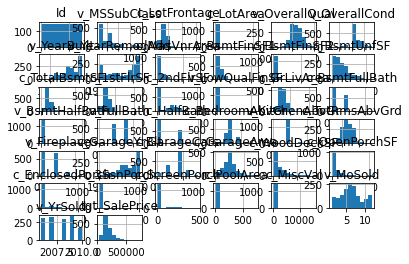

In [9]:
df.hist()

In [10]:
import pandas as pd
#pandas tiene por defecto como backend matplotlib 
pd.options.plotting.backend = "plotly"

In [11]:
df.columns

Index(['Id', 'v_MSSubClass', 'v_MSZoning', 'c_LotFrontage', 'c_LotArea',
       'v_Street', 'v_Alley', 'v_LotShape', 'v_LandContour', 'v_Utilities',
       'v_LotConfig', 'v_LandSlope', 'Neighborhood', 'v_Condition1',
       'v_Condition2', 'v_BldgType', 'v_HouseStyle', 'v_OverallQual',
       'v_OverallCond', 'v_YearBuilt', 'v_YearRemodAdd', 'v_RoofStyle',
       'v_RoofMatl', 'Exterior1st', 'Exterior2nd', 'v_MasVnrType',
       'c_MasVnrArea', 'v_ExterQual', 'v_ExterCond', 'v_Foundation',
       'v_BsmtQual', 'v_BsmtCond', 'v_BsmtExposure', 'v_BsmtFinType1',
       'c_BsmtFinSF1', 'v_BsmtFinType2', 'c_BsmtFinSF2', 'c_BsmtUnfSF',
       'c_TotalBsmtSF', 'v_Heating', 'v_HeatingQC', 'v_CentralAir',
       'v_Electrical', 'c_1stFlrSF', 'c_2ndFlrSF', 'v_LowQualFinSF',
       'c_GrLivArea', 'c_BsmtFullBath', 'v_BsmtHalfBath', 'v_FullBath',
       'c_HalfBath', 'c_BedroomAbvGr', 'v_KitchenAbvGr', 'v_KitchenQual',
       'c_TotRmsAbvGrd', 'v_Functional', 'v_Fireplaces', 'v_FireplaceQu',
    

In [12]:
df.filter(like="c_").hist()

In [13]:
df.plot.hist(x="c_LotArea",title="c_LotArea")

In [14]:
#Mejorar la calidad del gráfico

In [15]:
fig=df.plot.hist(x="c_LotArea",title="c_LotArea",labels={"c_LotArea":"LotArea"})
fig

- Axes : https://plotly.com/python/axes/
- Layout : https://plotly.com/python/reference/layout/

In [16]:
#Opcion 1 : title_text (Especificar cada caráctiristica del texto como parámetro)
#Opcion 2 text=dict() 

#### TITULO

In [17]:
#TITULO
fig=df.plot.hist(x="c_LotArea",title="c_LotArea",labels={"c_LotArea":"LotArea"})
fig.update_layout(title_text="Area Histogram",title_font_family = "Courier New" ,title_font_color="green")

In [18]:
#TITULO
fig=df.plot.hist(x="c_LotArea",title="c_LotArea",labels={"c_LotArea":"LotArea"})


In [19]:
fig.update_layout(title={"text":"Area Histogram","font":{"family":"Overpass","size":20,"color":"green"}})

#### Axis

In [20]:
#Axis
#https://plotly.com/python/reference/layout/xaxis/
fig=df.plot.hist(x="c_LotArea",title="c_LotArea",labels={"c_LotArea":"LotArea"})


In [21]:
fig.update_xaxes(title={"text":"Area","font":{"family":"Overpass","size":22}},visible=True,showgrid=True,gridcolor="green",gridwidth=5)

#### TICKS

In [22]:
#Ticks
#https://plotly.com/python/tick-formatting/
#https://github.com/d3/d3-format
fig=df.plot.hist(x="c_LotArea",title="c_LotArea",labels={"c_LotArea":"LotArea"})
fig.update_yaxes(showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=5,tickformat=",.2r")

#### Grid

In [23]:
#GRID
fig=df.plot.hist(x="c_LotArea",title="c_LotArea",labels={"c_LotArea":"LotArea"})

In [24]:
fig

In [25]:
fig.update_xaxes(showgrid=False,gridcolor="green",gridwidth=2)
fig.update_yaxes(showgrid=False,gridcolor="green",gridwidth=2)

In [26]:
#Line Axis
fig=df.plot.hist(x="c_LotArea",title="c_LotArea",labels={"c_LotArea":"LotArea"})
fig.update_yaxes(showgrid=False,showline=True,linewidth=2,linecolor="green")

#### Color

In [27]:
#COLOR
#https://plotly.com/python/reference/layout/#layout-paper_bgcolor
fig=df.plot.hist(x="c_LotArea",title="c_LotArea",labels={"c_LotArea":"LotArea"},color_discrete_sequence=[Berlin_20.hex_colors])


In [28]:
fig

In [29]:
fig.update_layout(paper_bgcolor="pink",plot_bgcolor="gray")

In [30]:
#color_discrete_map={"caracteristica":"#ffffff"}

In [31]:
#color_discrete_map   |diccionario
#color_discrete_sequence |lista de colores

pip install palettable

In [32]:
fig = px.colors.qualitative.swatches()
fig.show()

In [33]:
print(px.colors.qualitative.D3)

['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']


In [34]:
from palettable.scientific.diverging import Berlin_20
#https://jiffyclub.github.io/palettable/
Berlin_20.hex_colors

['#9EB0FF',
 '#80ACF1',
 '#5DA5DD',
 '#4194C1',
 '#307A9E',
 '#26627F',
 '#1C495F',
 '#153342',
 '#112028',
 '#131112',
 '#200B04',
 '#300F00',
 '#421301',
 '#571B06',
 '#752D17',
 '#904430',
 '#AC5E4F',
 '#C6776C',
 '#E3938E',
 '#FFADAD']

In [35]:
Berlin_20.hex_colors

['#9EB0FF',
 '#80ACF1',
 '#5DA5DD',
 '#4194C1',
 '#307A9E',
 '#26627F',
 '#1C495F',
 '#153342',
 '#112028',
 '#131112',
 '#200B04',
 '#300F00',
 '#421301',
 '#571B06',
 '#752D17',
 '#904430',
 '#AC5E4F',
 '#C6776C',
 '#E3938E',
 '#FFADAD']

#### Temas

In [36]:
#Temas
#https://plotly.com/python/templates/
#  "plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white"
df.plot.hist(x="tgt_SalePrice",title="tgt_SalePrice",template="ggplot2")

In [37]:
df.plot.hist(x="tgt_SalePrice",title="tgt_SalePrice",template="plotly_white")

### B)

In [38]:
import plotly.graph_objects as go

In [39]:
df["c_LotArea"].iplot(kind="histogram")

In [40]:
df["c_LotArea"].iplot(kind="histogram",bins=14)

In [41]:
df["c_LotArea"].iplot(title='',xTitle='Area',yTitle='Count')

In [42]:
fig

In [43]:
fig=df["c_LotArea"].iplot(kind="line",asFigure=True)

In [44]:
#OPCION B LAYOUT
layout = go.Layout(title={"text":"Area","font":{"size":30,"family":"Raleway"}},paper_bgcolor= "rgba(0,0,0,0)")

In [45]:
fig.update_layout(layout)

In [46]:
layout = go.Layout(title={"text":"Area Histogram","font":{"family":"Overpass","size":20,"color":"green"}})

In [47]:
fig.update_layout(layout)

### C)

In [48]:
#Graficos Express
#https://plotly.com/python/plotly-express/

- Basics: scatter, line, area, bar, funnel, timeline
- Part-of-Whole: pie, sunburst, treemap, funnel_area
- 1D Distributions: histogram, box, violin, strip
- 2D Distributions: density_heatmap, density_contour
- Matrix Input: imshow
- 3-Dimensional: scatter_3d, line_3d
- Multidimensional: scatter_matrix, parallel_coordinates, parallel_categories
- Tile Maps: scatter_mapbox, line_mapbox, choropleth_mapbox, density_mapbox
- Outline Maps: scatter_geo, line_geo, choropleth
- Polar Charts: scatter_polar, line_polar, bar_polar
- Ternary Charts: scatter_ternary, line_ternary

In [49]:
import plotly.express as px#graficos express

In [50]:
fig = px.histogram(df, x="c_LotArea",color_discrete_sequence=[Berlin_20.hex_colors])

In [51]:
fig

In [52]:
title="c_LotArea"

In [53]:
layout = go.Layout(title={"text":f"{title}","font":{"family":"Courier New, monospace","size":30,"color":"#004878"}},
                   xaxis= {"title": {"text":title,"font": {"family": 'Courier New, monospace',"size": 18,"color": '#002e4d'}}},
                   template="plotly_white")  

In [54]:
fig.update_layout(layout)

### D)

In [55]:
#Objetos graficos

In [56]:
import plotly.graph_objects as go

In [57]:
layout

Layout({
    'template': '...',
    'title': {'font': {'color': '#004878', 'family': 'Courier New, monospace', 'size': 30}, 'text': 'c_LotArea'},
    'xaxis': {'title': {'font': {'color': '#002e4d', 'family': 'Courier New, monospace', 'size': 18},
                        'text': 'c_LotArea'}}
})

In [58]:
fig = go.Figure(data=[go.Histogram(x=df["c_LotArea"],marker_color="#C6776C",opacity=0.75)],layout=layout)
fig

In [59]:
df

,Id,v_MSSubClass,v_MSZoning,c_LotFrontage,c_LotArea,v_Street,v_Alley,v_LotShape,v_LandContour,v_Utilities,v_LotConfig,v_LandSlope,Neighborhood,v_Condition1,v_Condition2,v_BldgType,v_HouseStyle,v_OverallQual,v_OverallCond,v_YearBuilt,v_YearRemodAdd,v_RoofStyle,v_RoofMatl,Exterior1st,Exterior2nd,v_MasVnrType,c_MasVnrArea,v_ExterQual,v_ExterCond,v_Foundation,v_BsmtQual,v_BsmtCond,v_BsmtExposure,v_BsmtFinType1,c_BsmtFinSF1,v_BsmtFinType2,c_BsmtFinSF2,c_BsmtUnfSF,c_TotalBsmtSF,v_Heating,v_HeatingQC,v_CentralAir,v_Electrical,c_1stFlrSF,c_2ndFlrSF,v_LowQualFinSF,c_GrLivArea,c_BsmtFullBath,v_BsmtHalfBath,v_FullBath,c_HalfBath,c_BedroomAbvGr,v_KitchenAbvGr,v_KitchenQual,c_TotRmsAbvGrd,v_Functional,v_Fireplaces,v_FireplaceQu,v_GarageType,v_GarageYrBlt,v_GarageFinish,c_GarageCars,c_GarageArea,v_GarageQual,v_GarageCond,v_PavedDrive,c_WoodDeckSF,c_OpenPorchSF,c_EnclosedPorch,c_3SsnPorch,c_ScreenPorch,c_PoolArea,v_PoolQC,v_Fence,v_MiscFeature,c_MiscVal,v_MoSold,v_YrSold,v_SaleType,v_SaleCondition,tgt_SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,N

In [60]:
df

,Id,v_MSSubClass,v_MSZoning,c_LotFrontage,c_LotArea,v_Street,v_Alley,v_LotShape,v_LandContour,v_Utilities,v_LotConfig,v_LandSlope,Neighborhood,v_Condition1,v_Condition2,v_BldgType,v_HouseStyle,v_OverallQual,v_OverallCond,v_YearBuilt,v_YearRemodAdd,v_RoofStyle,v_RoofMatl,Exterior1st,Exterior2nd,v_MasVnrType,c_MasVnrArea,v_ExterQual,v_ExterCond,v_Foundation,v_BsmtQual,v_BsmtCond,v_BsmtExposure,v_BsmtFinType1,c_BsmtFinSF1,v_BsmtFinType2,c_BsmtFinSF2,c_BsmtUnfSF,c_TotalBsmtSF,v_Heating,v_HeatingQC,v_CentralAir,v_Electrical,c_1stFlrSF,c_2ndFlrSF,v_LowQualFinSF,c_GrLivArea,c_BsmtFullBath,v_BsmtHalfBath,v_FullBath,c_HalfBath,c_BedroomAbvGr,v_KitchenAbvGr,v_KitchenQual,c_TotRmsAbvGrd,v_Functional,v_Fireplaces,v_FireplaceQu,v_GarageType,v_GarageYrBlt,v_GarageFinish,c_GarageCars,c_GarageArea,v_GarageQual,v_GarageCond,v_PavedDrive,c_WoodDeckSF,c_OpenPorchSF,c_EnclosedPorch,c_3SsnPorch,c_ScreenPorch,c_PoolArea,v_PoolQC,v_Fence,v_MiscFeature,c_MiscVal,v_MoSold,v_YrSold,v_SaleType,v_SaleCondition,tgt_SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,N

In [61]:
#Unir plots 
fig = go.Figure()
title="c_LotFrontage"
fig.add_trace(go.Histogram(x=df["c_LotFrontage"],marker_color="#C6776C",opacity=0.75))
title="c_GarageArea"
fig.add_trace(go.Histogram(x=df["c_GarageArea"],marker_color="blue",opacity=0.75))

In [62]:
fig.update_layout(bargap=0.1, # gap between bars of adjacent location coordinates
    bargroupgap=0.05)

In [63]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "xy"}, {"type": "polar"}],
           [{"type": "domain"}, {"type": "scene"}]],
)

fig.add_trace(go.Bar(y=[2, 3, 1]),
              row=1, col=1)

fig.add_trace(go.Barpolar(theta=[0, 45, 90], r=[2, 3, 1]),
              row=1, col=2)

fig.add_trace(go.Pie(values=[2, 3, 1]),
              row=2, col=1)

fig.add_trace(go.Scatter3d(x=[2, 3, 1], y=[0, 0, 0],
                           z=[0.5, 1, 2], mode="lines"),
              row=2, col=2)

fig.update_layout(height=700, showlegend=True)

fig.show()


### Guardar imagenes

In [64]:
fig

In [65]:
#pip install psutil
#pip install -U kaleido
fig.write_image("fig1.png")

In [66]:
from PIL import Image
im = Image.open("fig1.png")

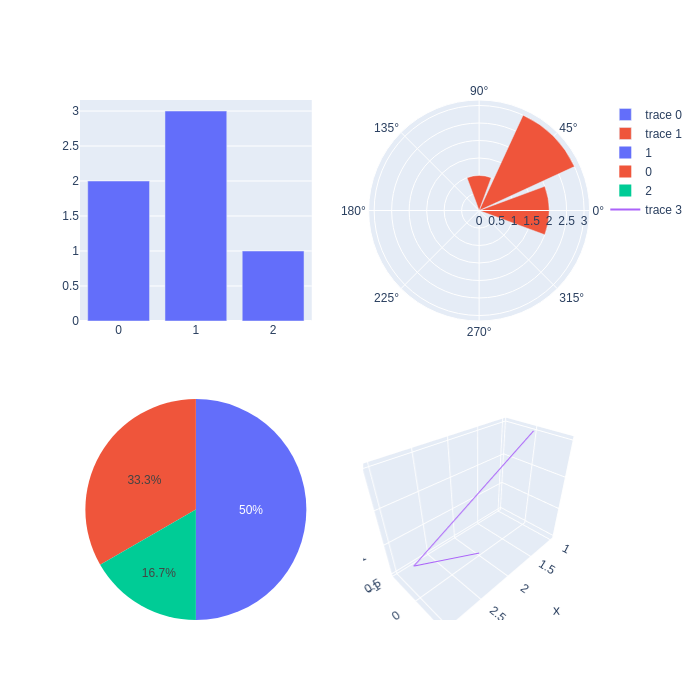

In [67]:
im

### BOX

In [68]:
title="c_LotArea"

In [69]:
layout = go.Layout(title={"text":f"{title}","font":{"family":"Courier New, monospace","size":30,"color":"#004878"}},
                   xaxis= {"title": {"text":title,"font": {"family": 'Courier New, monospace',"size": 18,"color": '#002e4d'}}},
                   template="plotly_white")

In [70]:
fig=df[[title]].iplot(kind='box',title=title,asFigure=True,layout=layout,color="#005a96", boxpoints='outliers')

In [71]:
fig = px.box(df, y=title)
fig.update_layout(layout)

In [74]:
#Separacion por valores de otra variable
fig = px.box(df, y=title,x="v_MSZoning")
fig.update_layout(layout)

In [75]:
#Color por categoria
fig = px.box(df, y=title,color="v_MSZoning")
fig.update_layout(layout)

- Si se sospecha que son valores atípicos, se muestran los puntos atípicos y se resaltan los puntos menores que 4Q1-3Q3 o mayores que  4Q3-3Q1 

In [76]:
from palettable.scientific.diverging import Berlin_20
#https://jiffyclub.github.io/palettable/
Berlin_20.hex_colors

['#9EB0FF',
 '#80ACF1',
 '#5DA5DD',
 '#4194C1',
 '#307A9E',
 '#26627F',
 '#1C495F',
 '#153342',
 '#112028',
 '#131112',
 '#200B04',
 '#300F00',
 '#421301',
 '#571B06',
 '#752D17',
 '#904430',
 '#AC5E4F',
 '#C6776C',
 '#E3938E',
 '#FFADAD']

In [77]:
#Color por plot
fig = px.box(df, y=title,color="v_MSZoning",  color_discrete_sequence=Berlin_20.hex_colors)
fig.update_layout(layout)

In [78]:
df

,Id,v_MSSubClass,v_MSZoning,c_LotFrontage,c_LotArea,v_Street,v_Alley,v_LotShape,v_LandContour,v_Utilities,v_LotConfig,v_LandSlope,Neighborhood,v_Condition1,v_Condition2,v_BldgType,v_HouseStyle,v_OverallQual,v_OverallCond,v_YearBuilt,v_YearRemodAdd,v_RoofStyle,v_RoofMatl,Exterior1st,Exterior2nd,v_MasVnrType,c_MasVnrArea,v_ExterQual,v_ExterCond,v_Foundation,v_BsmtQual,v_BsmtCond,v_BsmtExposure,v_BsmtFinType1,c_BsmtFinSF1,v_BsmtFinType2,c_BsmtFinSF2,c_BsmtUnfSF,c_TotalBsmtSF,v_Heating,v_HeatingQC,v_CentralAir,v_Electrical,c_1stFlrSF,c_2ndFlrSF,v_LowQualFinSF,c_GrLivArea,c_BsmtFullBath,v_BsmtHalfBath,v_FullBath,c_HalfBath,c_BedroomAbvGr,v_KitchenAbvGr,v_KitchenQual,c_TotRmsAbvGrd,v_Functional,v_Fireplaces,v_FireplaceQu,v_GarageType,v_GarageYrBlt,v_GarageFinish,c_GarageCars,c_GarageArea,v_GarageQual,v_GarageCond,v_PavedDrive,c_WoodDeckSF,c_OpenPorchSF,c_EnclosedPorch,c_3SsnPorch,c_ScreenPorch,c_PoolArea,v_PoolQC,v_Fence,v_MiscFeature,c_MiscVal,v_MoSold,v_YrSold,v_SaleType,v_SaleCondition,tgt_SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,N

In [79]:
fig = go.Figure()
fig.add_trace(go.Box(y=df["c_LotFrontage"], name='c_LotFrontage',
                marker_color = 'indianred',))
fig.add_trace(go.Box(y=df["c_LotArea"], name = "c_LotArea",
                marker_color = 'lightseagreen'))

fig.show()

In [80]:
#boxpoints='outliers' -- se muestran los valores afuera de los bigotes
#boxpoints="Suspected Outliers" -- Se muestran los puntos que son menores que  4Q1-3Q3 o mas grandes que 4Q3-3Q1


fig = go.Figure()
fig.add_trace(go.Box(y=df["c_LotFrontage"], name='c_LotFrontage',
                marker_color = 'indianred',boxpoints="suspectedoutliers"))
fig.add_trace(go.Box(y=df["c_LotArea"], name = "c_LotArea",
                marker_color = 'lightseagreen',boxpoints='outliers'))

fig.show()

In [81]:


fig = go.Figure()
fig.add_trace(go.Box(y=df["c_LotFrontage"], name='c_LotFrontage',
                marker_color = 'indianred',boxpoints="suspectedoutliers",
            marker_size=2,
            line_width=1))


fig.show()

### Bar

In [82]:
df

,Id,v_MSSubClass,v_MSZoning,c_LotFrontage,c_LotArea,v_Street,v_Alley,v_LotShape,v_LandContour,v_Utilities,v_LotConfig,v_LandSlope,Neighborhood,v_Condition1,v_Condition2,v_BldgType,v_HouseStyle,v_OverallQual,v_OverallCond,v_YearBuilt,v_YearRemodAdd,v_RoofStyle,v_RoofMatl,Exterior1st,Exterior2nd,v_MasVnrType,c_MasVnrArea,v_ExterQual,v_ExterCond,v_Foundation,v_BsmtQual,v_BsmtCond,v_BsmtExposure,v_BsmtFinType1,c_BsmtFinSF1,v_BsmtFinType2,c_BsmtFinSF2,c_BsmtUnfSF,c_TotalBsmtSF,v_Heating,v_HeatingQC,v_CentralAir,v_Electrical,c_1stFlrSF,c_2ndFlrSF,v_LowQualFinSF,c_GrLivArea,c_BsmtFullBath,v_BsmtHalfBath,v_FullBath,c_HalfBath,c_BedroomAbvGr,v_KitchenAbvGr,v_KitchenQual,c_TotRmsAbvGrd,v_Functional,v_Fireplaces,v_FireplaceQu,v_GarageType,v_GarageYrBlt,v_GarageFinish,c_GarageCars,c_GarageArea,v_GarageQual,v_GarageCond,v_PavedDrive,c_WoodDeckSF,c_OpenPorchSF,c_EnclosedPorch,c_3SsnPorch,c_ScreenPorch,c_PoolArea,v_PoolQC,v_Fence,v_MiscFeature,c_MiscVal,v_MoSold,v_YrSold,v_SaleType,v_SaleCondition,tgt_SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,N

In [83]:
col="v_MSZoning"

In [84]:
aux=pd.DataFrame(df[col].value_counts()).reset_index().rename(columns={"index":"conteo"})

In [85]:
aux

,conteo,v_MSZoning
0,RL,1151
1,RM,218
2,FV,65
3,RH,16
4,C (all),10


In [86]:
fig=aux.iplot(kind='bar',x="conteo",y=col,title=title,asFigure=True,barmode="overlay",sortbars=True,color="#255479",layout=layout)
fig.update_layout(layout)


In [87]:
fig

In [88]:
df

,Id,v_MSSubClass,v_MSZoning,c_LotFrontage,c_LotArea,v_Street,v_Alley,v_LotShape,v_LandContour,v_Utilities,v_LotConfig,v_LandSlope,Neighborhood,v_Condition1,v_Condition2,v_BldgType,v_HouseStyle,v_OverallQual,v_OverallCond,v_YearBuilt,v_YearRemodAdd,v_RoofStyle,v_RoofMatl,Exterior1st,Exterior2nd,v_MasVnrType,c_MasVnrArea,v_ExterQual,v_ExterCond,v_Foundation,v_BsmtQual,v_BsmtCond,v_BsmtExposure,v_BsmtFinType1,c_BsmtFinSF1,v_BsmtFinType2,c_BsmtFinSF2,c_BsmtUnfSF,c_TotalBsmtSF,v_Heating,v_HeatingQC,v_CentralAir,v_Electrical,c_1stFlrSF,c_2ndFlrSF,v_LowQualFinSF,c_GrLivArea,c_BsmtFullBath,v_BsmtHalfBath,v_FullBath,c_HalfBath,c_BedroomAbvGr,v_KitchenAbvGr,v_KitchenQual,c_TotRmsAbvGrd,v_Functional,v_Fireplaces,v_FireplaceQu,v_GarageType,v_GarageYrBlt,v_GarageFinish,c_GarageCars,c_GarageArea,v_GarageQual,v_GarageCond,v_PavedDrive,c_WoodDeckSF,c_OpenPorchSF,c_EnclosedPorch,c_3SsnPorch,c_ScreenPorch,c_PoolArea,v_PoolQC,v_Fence,v_MiscFeature,c_MiscVal,v_MoSold,v_YrSold,v_SaleType,v_SaleCondition,tgt_SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,N

In [89]:
import plotly.express as px
long_df = px.data.medals_long()

In [90]:
long_df

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


In [91]:
fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input")
fig.show()

In [92]:
aux

,conteo,v_MSZoning
0,RL,1151
1,RM,218
2,FV,65
3,RH,16
4,C (all),10


In [93]:
df = px.data.tips()

In [94]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [96]:
x = ['Product A', 'Product B', 'Product C']
y = [20, 14, 23]

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['27% market share', '24% market share', '19% market share'])])
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='January 2013 Sales Report')
fig.show()